<a href="https://colab.research.google.com/github/muqarrab469/insightshield/blob/main/NewsRankingUsingOurModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**News Ranking**

In [ ]:
!pip install beautifulsoup4
!pip install pandas
!pip install nltk
!pip install tensorflow

import pandas as pd
import re
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import unicodedata
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('punkt')

#Preprocessing function
def preprocess_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('ascii')
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/FYP/bbc_articles.csv'
df = pd.read_csv(file_path)

model_path = '/content/drive/My Drive/FYP/news_detection_model.h5'
model = load_model(model_path)

df['processed_title'] = df['news_title'].apply(preprocess_text)
df['processed_text'] = df['news_text'].apply(preprocess_text)
df['combined_text'] = df['processed_title'] + ' ' + df['processed_text']

max_len = 1000
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['combined_text'])
sequences = tokenizer.texts_to_sequences(df['combined_text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

predictions = model.predict(padded_sequences)
labels = ['Fake', 'Real']
df['predicted_label'] = [labels[int(pred > 0.5)] for pred in predictions]

print(df[['id', 'news_title', 'predicted_label']])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 174ms/step
   id                                         news_title predicted_label
0   1  How climate change worsens heatwaves, droughts...            Real
1   2          Behind the 'Zuma tsunami' in South Africa            Real
2   3  Court rules Google must face £13.6bn advertisi...            Real
3   4  F1 driver Lance Stroll's guide to a weekend in...            Real
4   5  The Pacific Crest Trail: The US West Coast's '...            Fake
5   6  Applegate 'doesn't enjoy living' after MS diag...            Fake
6   8  ANC eyes national unity government  after elec...            Real
7  10  The pub where Eisenhower and Patton made D-Day...            Real


<ipython-input-2-f3f6608eb104>:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  df['predicted_label'] = [labels[int(pred > 0.5)] for pred in predictions]


**Bar Chart for Ranking:**

<ipython-input-5-6defe766eb97>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='prediction_score', y='news_title', data=df_sorted, palette='viridis')


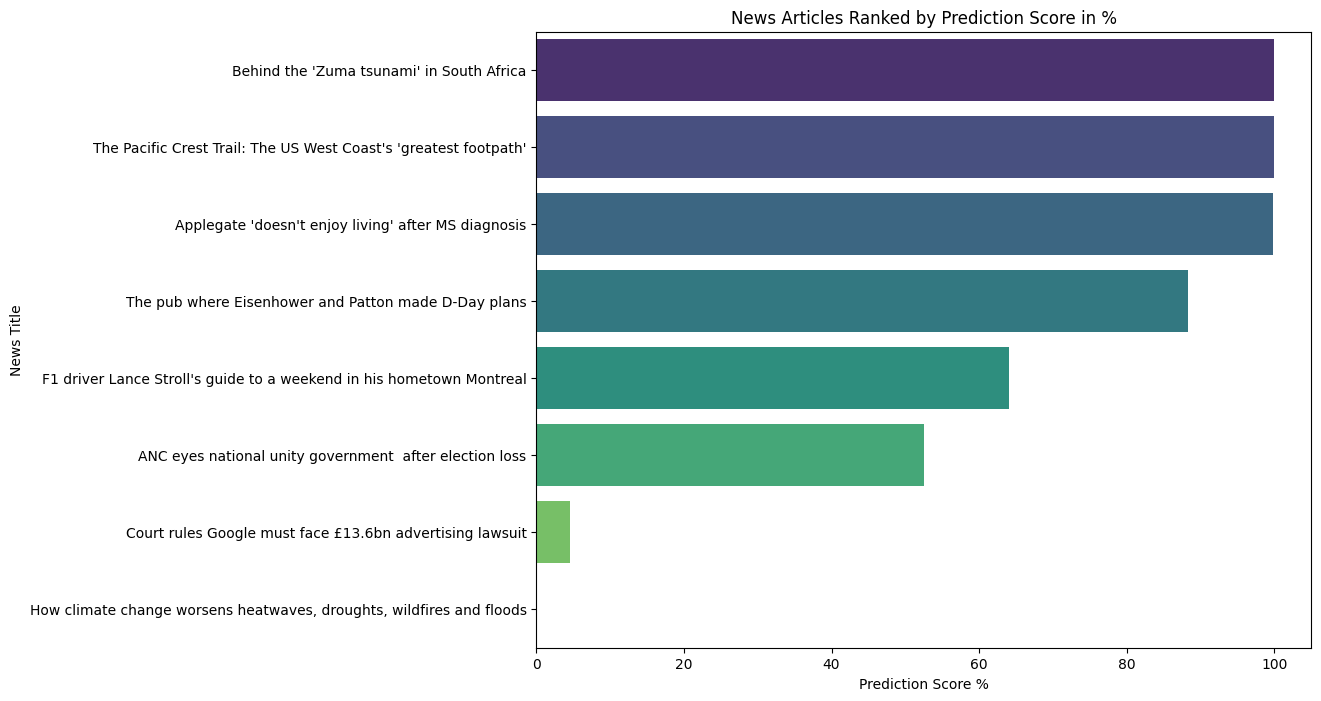

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['prediction_score'] = predictions*100

df_sorted = df.sort_values(by='prediction_score', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='prediction_score', y='news_title', data=df_sorted, palette='viridis')
plt.title('News Articles Ranked by Prediction Score in %')
plt.xlabel('Prediction Score %')
plt.ylabel('News Title')
plt.show()


Image Model Use:

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

#from google.colab import drive
#drive.mount('/content/drive')

model_path = "/content/drive/MyDrive/FYP/image_tampering_detection_model.h5"
model = load_model(model_path)

def classify_image(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Unable to load image '{image_path}'")
            return None

        resized_image = cv2.resize(image, (128, 128))  # Resize to match input shape of the model

        normalized_image = resized_image.astype('float32') / 255.0

        input_image = np.expand_dims(normalized_image, axis=0)

        prediction = model.predict(input_image)

        return "Authentic Image" if prediction >= 0.5 else "Tampered Image"
    except Exception as e:
        print(f"Error: {e}")
        return None

images_folder = "/content/drive/MyDrive/FYP/bbc_images/"

results = []
for filename in os.listdir(images_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(images_folder, filename)
        result = classify_image(image_path)
        if result is not None:
            results.append((filename, result))
        else:
            print(f"Error: Failed to classify image '{image_path}'. Skipping.")

for filename, result in results:
    print(f"Image: {filename}, Classification: {result}")


1/1 [==============================] - 0s 204ms/step
Image: news_9.jpg, Classification: Authentic Image
Image: news_2.jpg, Classification: Authentic Image
Image: news_6.jpg, Classification: Authentic Image
Image: news_1.jpg, Classification: Authentic Image
Image: news_3.jpg, Classification: Authentic Image
Image: news_4.jpg, Classification: Authentic Image
Image: news_5.jpg, Classification: Authentic Image
Image: news_8.jpg, Classification: Authentic Image
Image: news_7.jpg, Classification: Authentic Image
Image: news_10.jpg, Classification: Authentic Image
